### Assignment 1 - Deep Reinforcement Learning
#### Submitted by : <font color='red'>Karthick Raja S</font>
#### Roll Number: 22/230

### Contents

* Question
* Glossary
* Initial condition
* Update condition
* Output
* Python code for state feature vector
* Solution 1.1, 1.2, 1.3
* Solution 2.1, 2.2, 2.3
* Conclusion
* <font color='red'> Something that i tried : Epsilon greedy algorithm & Thompson sampling algorithm for choosing action </font>

#### Question

* Consider a 5 x 5 with 25 state as shown below
* Possible actions are left, right, up and down
* All the actions can be employed in one step at a time
* States A and B are special states
    * Any action in state A (state:1) leads to A'(state:17) and gives a reward of 10
    * Any action in state B (state:3) leads to B'(state:14) and gives a reward of 5

$$\begin{bmatrix} * & A & * & B & * \\
                 * & * & * & * & * \\
                 * & * & * & B' & *\\
                 * & A' & * & * & *\\
                 * & * & * & * & *\end{bmatrix} $$

* If we are in a boundry state and we pick up an action that takes us out of the grid, we stay there but the reward is -1
* For any other movement between the states fetches a reward of 0
* We are considering considering a equi-probable policy

$$\pi(\uparrow/s) =  \pi(\downarrow/s) = \pi(\leftarrow/s) = \pi(\rightarrow/s) = \frac{1}{4} $$


Considering 2 different kinds of state features:
* $\begin{bmatrix} 1 & 0 & 0 & 0 & 0\cdots & 0 &0 \end{bmatrix}^{T} $ with 25 dimensions <br>
* scalar feature: $\frac{n}{25}$ where n $\in$ {1...25}

Three different starting conditions:
* Middle state : 13
* First state : 2
* Last state : 25

<font color='red'> Note: I have taken the liberty to have state value matrix, instead of state value vector (as explained by professor ) for the ease of writing the environment and program. </font>

#### Glossary

* $t$ time $\in T$ can be set by altering the variable EPOCH
* $S$ states : 0 to 24 
* $R$ Rewards : 0 for all cell, -1 for moves going out of the grid and 10 , 5 special cases
* $r_t$ reward at time t  $\in$ in R
* $s_t$ state at time t $\in$ in S
* $j_t$ utility value at time t
* $\alpha_t$ learning parameter held constant for every 50 epochs
* $\vartheta(s_t)$ - value function / differential reward for state s and time t
* $ Epoch $ - Total number of moves


#### Initial condition

$$ \hat{j_{t}} = 0 $$ <br>
$$ \vartheta_{t}(s) = \begin{bmatrix} 0 & 0 & 0 & 0 & 0 \\
                 0 & 0 & 0 & 0 & 0 \\
                 0 & 0 & 0 & 0 & 0\\
                 0 & 0 & 0 & 0 & 0\\
                 0 & 0 & 0 & 0 & 0\end{bmatrix} $$

#### Update conditions

$$ \hat{j_{t+1}} = \hat{j_{t}} + \alpha_t ( r_{t+1} - \hat{j_{t}} ) $$ <br>
$$ \delta_{t} = r_{t+1} - \hat{j_{t+1}} + \gamma \vartheta(s_{t+1}) - \vartheta(s_{t})$$ <br>
$$ \vartheta(s_{t+1}) = \vartheta_{t}(s) + \alpha_{t} \delta_{t}   \enspace   \forall s \in S $$ <br>

#### Ouput

* Plot of utilization as a function of time
* Plot of average state-value as a function of time ( for vector state space )
* Plot of state-value as  a function of time ( for scalar vector space )

#### Python code for Question 1

In [66]:
import numpy as np
from gridworld import gridworld
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
EPOCHS = 10000

In [115]:
class play:
    
    def __init__(self, initial_state):
        self.rewards = []
        self.utility = [0]
        self.value_matrix = np.zeros((5,5))
        self.delta = []
        self.states = []
        self.initial_state = initial_state
        self.states.append(initial_state)
        self.value_function = []
        self.env = gridworld(initial_state=initial_state)
        self.EPOCHS = EPOCHS
        self.print_epoch = EPOCHS/10
        self.actions = []
    
    def update_value_matrix(self, observation, new_observation, reward, s_alpha):
        '''Return the updated utility matrix
        @param utility_matrix the matrix before the update
        @return the updated utility matrix
        '''
        v_s= self.value_matrix[observation[0], observation[1]]
        v_s1 = self.value_matrix[new_observation[0], new_observation[1]]
        self.utility.append(self.utility[-1]+s_alpha*(reward-self.utility[-1]))
        self.delta.append(reward - self.utility[-1] + v_s1 - v_s)
        new_value = v_s + s_alpha*self.delta[-1]
        self.value_matrix[observation[0], observation[1]] = new_value
        self.value_function.append(self.value_matrix.sum()/25)
    
    def alpha(self, t):
        return 1 / (divmod(t,50)[0]+1)
    
    def run_experiment(self):
        for step in range(self.EPOCHS+1):
            #Take the action from the action matrix
            action = np.random.randint(4)
            self.actions.append(action)
            #Move one step in the environment and get obs and reward
            reward, new_state = self.env.step(action)
            self.update_value_matrix(self.states[-1], new_state, reward,self.alpha(step))
            self.rewards.append(reward)
            self.states.append(new_state)
            if step%self.print_epoch==0:
                print(" {0:} | states: {1:}| rewards: {2:} | utility :{3:2f}| delta: {4:.2f} | value_function: {5:.2f} | updated".format("step:"+str(step),\
                                                                                                    self.states[-1],\
                                                                                                    self.rewards[-1],\
                                                                                                    self.utility[-1],\
                                                                                                    self.delta[-1],\
                                                                                                    self.value_function[-1]))
    
    def plot_value_matrix(self):
        plt.figure(figsize=(15,7))
        sns.heatmap(self.value_matrix, annot=True, fmt='g')
        plt.title(r" $\vartheta$ state value")
        plt.xlabel("x-axis")
        plt.ylabel("y-axis")
        plt.tight_layout()
        plt.show()
    
    def plot_utility(self):
        fig, ax = plt.subplots()
        fig.set_figheight(7)
        fig.set_figwidth(15)
        plt.plot(self.utility)
        plt.title("Utility plot")
        textstr = '\n'.join((
            r'$\mu=%.2f$' % (np.mean(self.utility), ),
            r'$\mathrm{median}=%.2f$' % (np.median(self.utility), ),
            r'$last-value =%.2f$' % (self.utility[-1])))
        # these are matplotlib.patch.Patch properties
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.8, 0.95, textstr, transform=ax.transAxes, fontsize=14,
                verticalalignment='top',bbox =props)
        plt.xlabel(" Time ")
        plt.ylabel(" $\hat{J}   utility $")
        plt.show()
    
    def plot_value_function(self):
        fig, ax = plt.subplots()
        fig.set_figheight(7)
        fig.set_figwidth(15)
        plt.plot(self.value_function)
        plt.title("Average value plot")
        textstr = '\n'.join((
            r'$\mu=%.2f$' % (np.mean(self.value_function), ),
            r'$\mathrm{median}=%.2f$' % (np.median(self.value_function),),
            r'$last-value =%.2f$' % (self.value_function[-1])))
        # these are matplotlib.patch.Patch properties
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.8, 0.95, textstr, transform=ax.transAxes, fontsize=14,
                verticalalignment='top',bbox =props)
        plt.xlabel(" Time ")
        plt.ylabel(r" $ \vartheta --- Average value $")
        plt.show()

#### Solution 1
##### starting at position 13: 2,2

In [116]:
q1_s1 = play([2,2])
q1_s1.run_experiment()

 step:0 | states: [2, 3]| rewards: 0 | utility :0.000000| delta: 0.00 | value_function: 0.00 | updated
 step:1000 | states: [3, 3]| rewards: -1 | utility :0.059307| delta: -1.06 | value_function: 0.23 | updated
 step:2000 | states: [2, 0]| rewards: 0 | utility :0.466142| delta: 1.44 | value_function: 0.26 | updated
 step:3000 | states: [2, 1]| rewards: 0 | utility :1.103783| delta: 0.48 | value_function: 0.30 | updated
 step:4000 | states: [2, 1]| rewards: 0 | utility :0.344105| delta: -0.18 | value_function: 0.27 | updated
 step:5000 | states: [1, 0]| rewards: 0 | utility :0.761534| delta: 3.93 | value_function: 0.29 | updated
 step:6000 | states: [0, 2]| rewards: 0 | utility :0.054485| delta: 8.21 | value_function: 0.26 | updated
 step:7000 | states: [3, 2]| rewards: 0 | utility :0.286549| delta: -3.99 | value_function: 0.27 | updated
 step:8000 | states: [0, 0]| rewards: 0 | utility :1.124227| delta: 4.87 | value_function: 0.31 | updated
 step:9000 | states: [1, 1]| rewards: 0 | uti

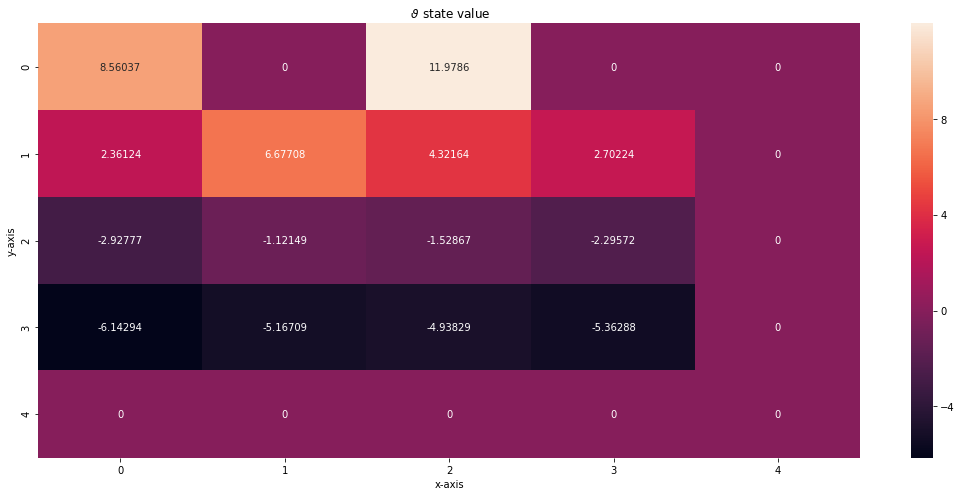

In [117]:
q1_s1.plot_value_matrix()

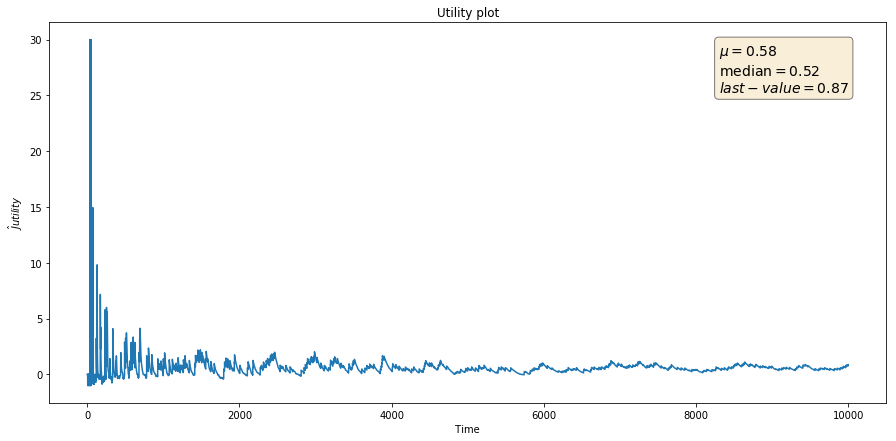

In [71]:
q1_s1.plot_utility()

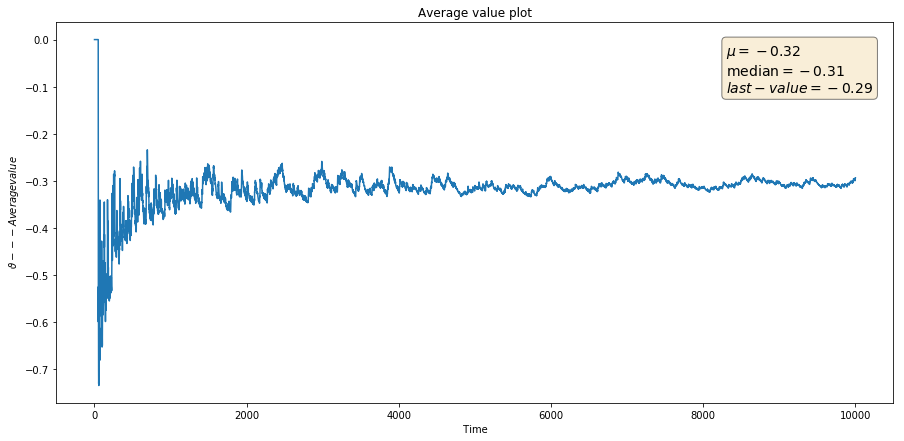

In [72]:
q1_s1.plot_value_function()

#### Solution 1
##### starting at position 2: 0,1

In [73]:
q1_s2 = play([0,2])
q1_s2.run_experiment()

 step:0 | states: [1, 2]| rewards: 0 | utility :0.000000| delta: 0.00 | value_function: 0.00 | updated
 step:1000 | states: [3, 1]| rewards: -1 | utility :0.193016| delta: -1.19 | value_function: 0.23 | updated
 step:2000 | states: [3, 3]| rewards: 0 | utility :-0.020497| delta: -3.54 | value_function: 0.24 | updated
 step:3000 | states: [0, 2]| rewards: 0 | utility :0.608472| delta: 5.49 | value_function: 0.29 | updated
 step:4000 | states: [2, 3]| rewards: 0 | utility :0.551148| delta: -1.58 | value_function: 0.28 | updated
 step:5000 | states: [1, 1]| rewards: 0 | utility :0.150047| delta: 2.49 | value_function: 0.27 | updated
 step:6000 | states: [2, 1]| rewards: 0 | utility :0.608582| delta: 3.49 | value_function: 0.29 | updated
 step:7000 | states: [2, 2]| rewards: 0 | utility :0.283096| delta: 0.45 | value_function: 0.27 | updated
 step:8000 | states: [1, 3]| rewards: -1 | utility :0.426710| delta: -1.43 | value_function: 0.28 | updated
 step:9000 | states: [3, 3]| rewards: -1 |

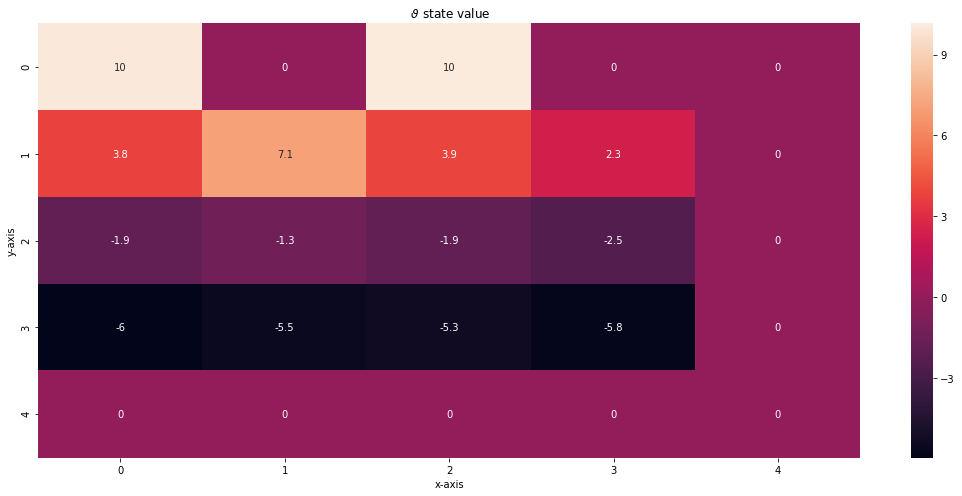

In [74]:
q1_s2.plot_value_matrix()

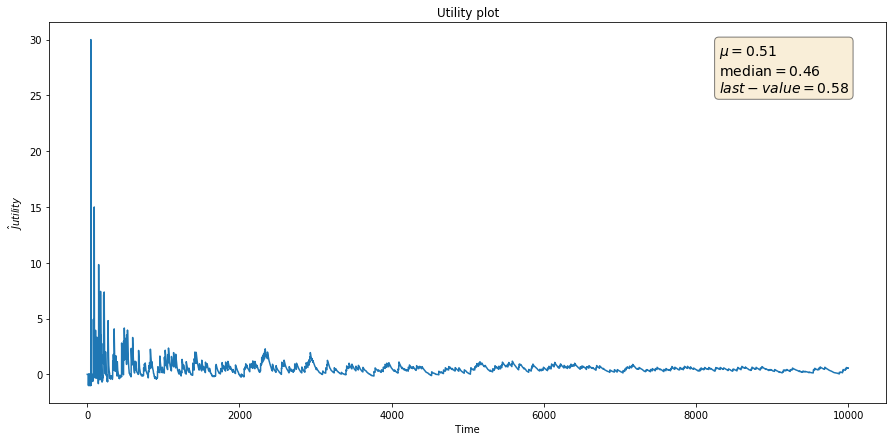

In [75]:
q1_s2.plot_utility()

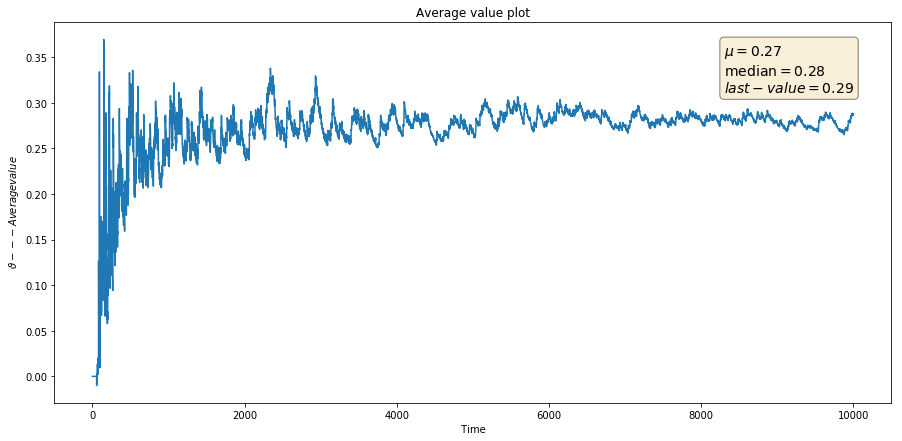

In [76]:
q1_s2.plot_value_function()

#### Solution 1
##### starting at position 25: 4,4

In [77]:
q1_s3 = play([4,4])
q1_s3.run_experiment()

 step:0 | states: [4, 4]| rewards: -1 | utility :-1.000000| delta: 0.00 | value_function: 0.00 | updated
 step:1000 | states: [4, 4]| rewards: -1 | utility :-1.000000| delta: 0.00 | value_function: 0.00 | updated
 step:2000 | states: [4, 4]| rewards: -1 | utility :-1.000000| delta: 0.00 | value_function: 0.00 | updated
 step:3000 | states: [4, 4]| rewards: -1 | utility :-1.000000| delta: 0.00 | value_function: 0.00 | updated
 step:4000 | states: [4, 4]| rewards: -1 | utility :-1.000000| delta: 0.00 | value_function: 0.00 | updated
 step:5000 | states: [4, 4]| rewards: -1 | utility :-1.000000| delta: 0.00 | value_function: 0.00 | updated
 step:6000 | states: [4, 4]| rewards: -1 | utility :-1.000000| delta: 0.00 | value_function: 0.00 | updated
 step:7000 | states: [4, 4]| rewards: -1 | utility :-1.000000| delta: 0.00 | value_function: 0.00 | updated
 step:8000 | states: [4, 4]| rewards: -1 | utility :-1.000000| delta: 0.00 | value_function: 0.00 | updated
 step:9000 | states: [4, 4]| re

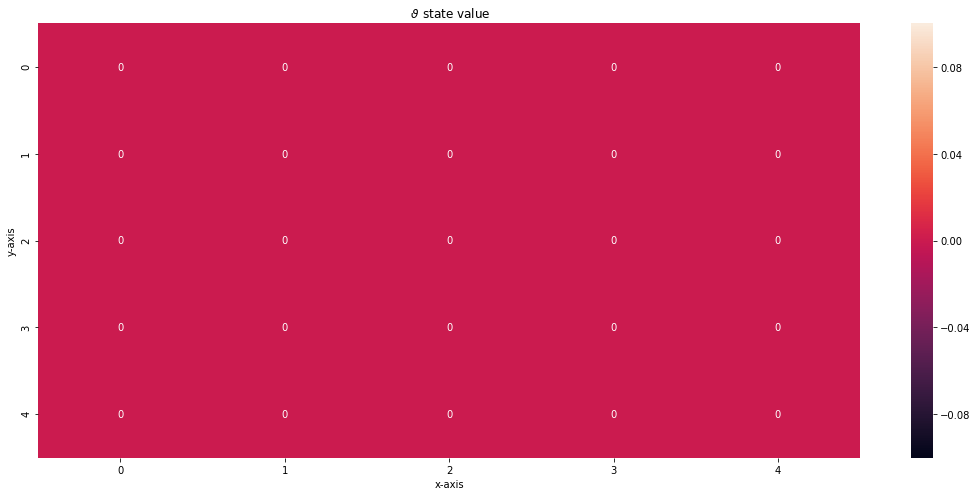

In [78]:
q1_s3.plot_value_matrix()

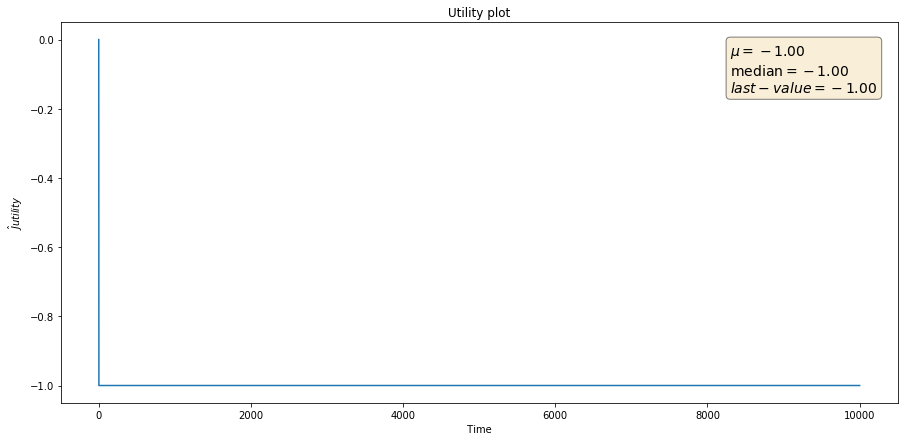

In [79]:
q1_s3.plot_utility()

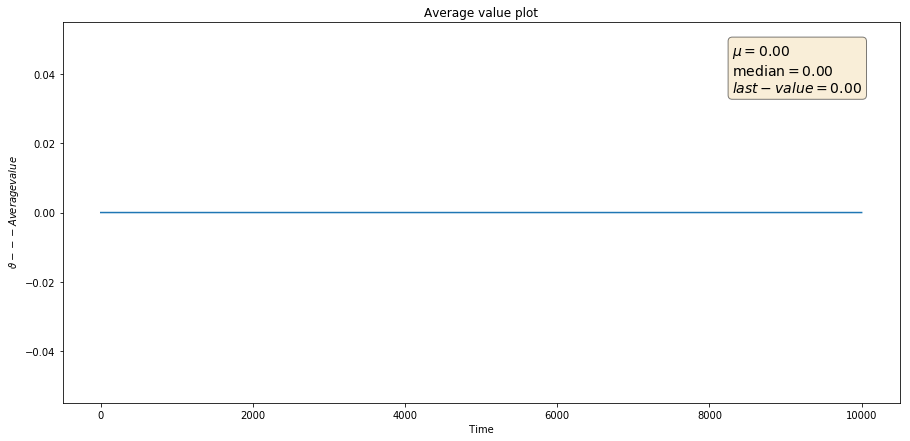

In [80]:
q1_s3.plot_value_function()

#### Python code for Question 2

In [81]:
class play_scalar:
    
    def __init__(self, initial_state):
        self.rewards = []
        self.utility = [0]
        self.value_function = []
        self.delta = []
        self.states = []
        self.initial_state = initial_state
        self.state_matrix = (np.array(range(25)).reshape(5,5)+1)/25
        self.state_no = self.state_matrix[self.initial_state[0],self.initial_state[1]]
        self.states.append(self.state_no)
        self.env = gridworld(initial_state=self.initial_state)
        self.EPOCHS = EPOCHS
        self.print_epoch = EPOCHS/10
        self.actions = []
    
    def update_value_matrix(self, old_state, new_state, reward, s_alpha):
        '''Return the updated utility matrix
        @param utility_matrix the matrix before the update
        @return the updated utility matrix
        '''
        v_s= old_state
        v_s1 = new_state
        self.utility.append(self.utility[-1]+s_alpha*(reward-self.utility[-1]))
        self.delta.append(reward - self.utility[-1] + v_s1 - v_s)
        new_value = v_s + s_alpha*self.delta[-1]
        self.value_function.append(new_value)
    
    def alpha(self, t):
        return 1 / (divmod(t,50)[0]+1)
    
    def run_experiment(self):
        for step in range(self.EPOCHS+1):
            #Take the action from the action matrix
            action = np.random.randint(4)
            self.actions.append(action)
            #Move one step in the environment and get obs and reward
            reward, new_state = self.env.step(action)
            new_state = self.state_matrix[new_state[0],new_state[1]]
            self.update_value_matrix(self.states[-1], new_state, reward,self.alpha(step))
            self.rewards.append(reward)
            self.states.append(new_state)
            if step%self.print_epoch==0:
                print(" {0:} | states: {1:}| rewards: {2:} | utility :{3:2f}| delta: {4:.2f} | value_function: {5:.2f} | updated".format("step:"+str(step),\
                                                                                                    self.states[-1],\
                                                                                                    self.rewards[-1],\
                                                                                                    self.utility[-1],\
                                                                                                    self.delta[-1],\
                                                                                                    self.value_function[-1]))
    
    def plot_utility(self):
        fig, ax = plt.subplots()
        fig.set_figheight(7)
        fig.set_figwidth(15)
        plt.plot(self.utility)
        plt.title("Utility plot")
        textstr = '\n'.join((
            r'$\mu=%.2f$' % (np.mean(self.utility), ),
            r'$\mathrm{median}=%.2f$' % (np.median(self.utility), ),
            r'$last-value =%.2f$' % (self.utility[-1])))
        # these are matplotlib.patch.Patch properties
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.8, 0.95, textstr, transform=ax.transAxes, fontsize=14,
                verticalalignment='top',bbox =props)
        plt.xlabel(" Time ")
        plt.ylabel(" $\hat{J}   utility $")
        plt.show()
    
    def plot_value_function(self):
        fig, ax = plt.subplots()
        fig.set_figheight(7)
        fig.set_figwidth(15)
        plt.plot(self.value_function)
        plt.title("Average value plot")
        textstr = '\n'.join((
            r'$\mu=%.2f$' % (np.mean(self.value_function), ),
            r'$\mathrm{median}=%.2f$' % (np.median(self.value_function),),
            r'$last-value =%.2f$' % (self.value_function[-1])))
        # these are matplotlib.patch.Patch properties
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.8, 0.95, textstr, transform=ax.transAxes, fontsize=14,
                verticalalignment='top',bbox =props)
        plt.xlabel(" Time ")
        plt.ylabel(r" $ \vartheta --- Average value $")
        plt.show()

#### Solution 2
#### Starting position : 13

In [82]:
q2_s1 = play_scalar([2,2])
q2_s1.run_experiment()

 step:0 | states: 0.72| rewards: 0 | utility :0.000000| delta: 0.20 | value_function: 0.72 | updated
 step:1000 | states: 0.56| rewards: 0 | utility :0.537720| delta: -0.50 | value_function: 0.50 | updated
 step:2000 | states: 0.68| rewards: 30 | utility :1.554860| delta: 29.01 | value_function: 0.83 | updated
 step:3000 | states: 0.72| rewards: -1 | utility :1.176608| delta: -2.18 | value_function: 0.68 | updated
 step:4000 | states: 0.56| rewards: 0 | utility :0.113364| delta: 0.09 | value_function: 0.36 | updated
 step:5000 | states: 0.52| rewards: 0 | utility :0.599109| delta: -0.80 | value_function: 0.71 | updated
 step:6000 | states: 0.76| rewards: -1 | utility :0.542306| delta: -1.54 | value_function: 0.75 | updated
 step:7000 | states: 0.68| rewards: 0 | utility :0.464637| delta: -0.26 | value_function: 0.48 | updated
 step:8000 | states: 0.04| rewards: 0 | utility :0.774747| delta: -0.97 | value_function: 0.23 | updated
 step:9000 | states: 0.68| rewards: 0 | utility :0.561967

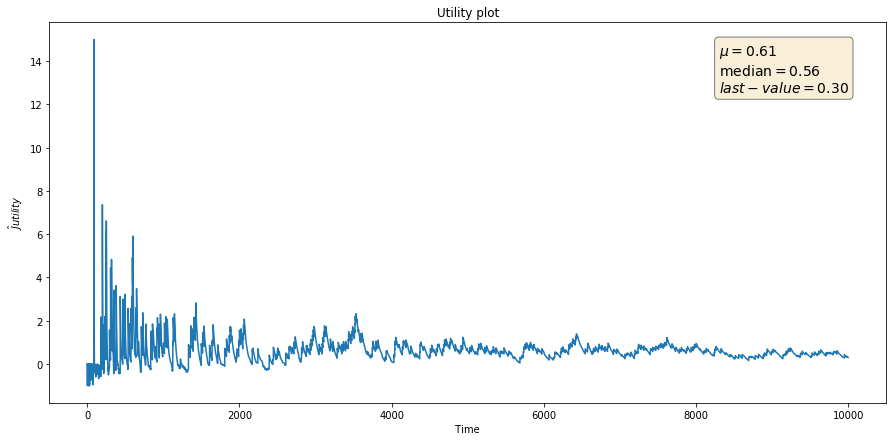

In [83]:
q2_s1.plot_utility()

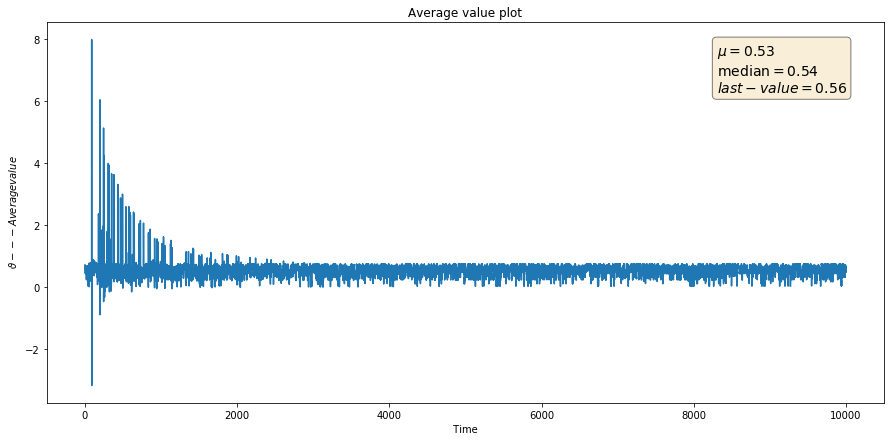

In [84]:
q2_s1.plot_value_function()

#### Solution 2
#### Starting position : 2

In [85]:
q2_s2 = play_scalar([0,1])
q2_s2.run_experiment()

 step:0 | states: 0.08| rewards: -1 | utility :-1.000000| delta: 0.00 | value_function: 0.08 | updated
 step:1000 | states: 0.24| rewards: -1 | utility :1.053253| delta: -2.05 | value_function: 0.14 | updated
 step:2000 | states: 0.44| rewards: 0 | utility :0.054681| delta: 0.15 | value_function: 0.24 | updated
 step:3000 | states: 0.56| rewards: 0 | utility :0.556490| delta: -0.76 | value_function: 0.75 | updated
 step:4000 | states: 0.44| rewards: 0 | utility :0.335527| delta: -0.38 | value_function: 0.48 | updated
 step:5000 | states: 0.68| rewards: -1 | utility :0.469045| delta: -1.47 | value_function: 0.67 | updated
 step:6000 | states: 0.44| rewards: 0 | utility :0.896327| delta: -0.70 | value_function: 0.23 | updated
 step:7000 | states: 0.76| rewards: 0 | utility :0.826584| delta: -0.63 | value_function: 0.56 | updated
 step:8000 | states: 0.44| rewards: 0 | utility :0.800316| delta: -0.84 | value_function: 0.47 | updated
 step:9000 | states: 0.04| rewards: 0 | utility :0.64049

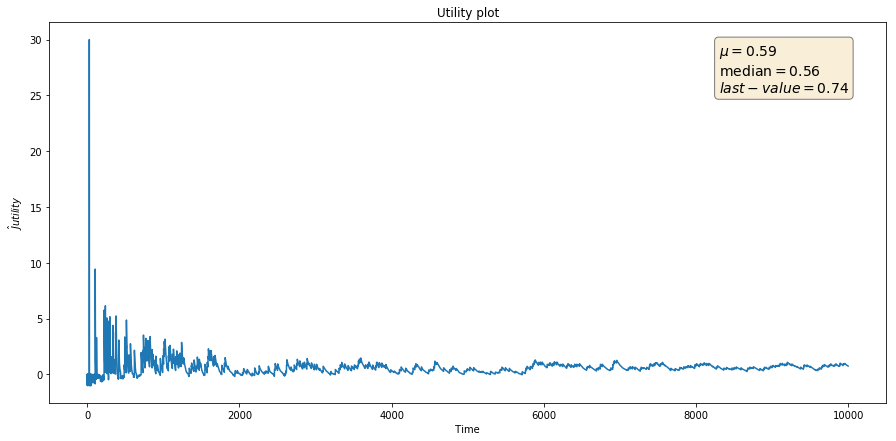

In [86]:
q2_s2.plot_utility()

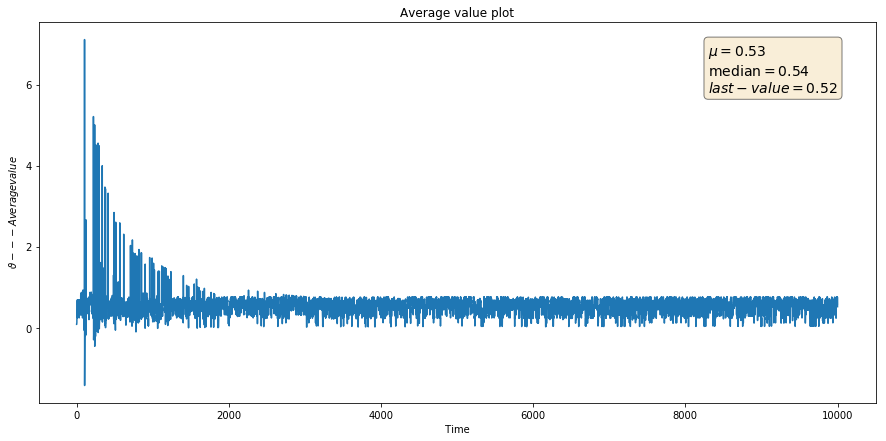

In [87]:
q2_s2.plot_value_function()

#### Solution 2
#### Starting position : 25

In [88]:
q2_s3 = play_scalar([4,4])
q2_s3.run_experiment()

 step:0 | states: 1.0| rewards: -1 | utility :-1.000000| delta: 0.00 | value_function: 1.00 | updated
 step:1000 | states: 1.0| rewards: -1 | utility :-1.000000| delta: 0.00 | value_function: 1.00 | updated
 step:2000 | states: 1.0| rewards: -1 | utility :-1.000000| delta: 0.00 | value_function: 1.00 | updated
 step:3000 | states: 1.0| rewards: -1 | utility :-1.000000| delta: 0.00 | value_function: 1.00 | updated
 step:4000 | states: 1.0| rewards: -1 | utility :-1.000000| delta: 0.00 | value_function: 1.00 | updated
 step:5000 | states: 1.0| rewards: -1 | utility :-1.000000| delta: 0.00 | value_function: 1.00 | updated
 step:6000 | states: 1.0| rewards: -1 | utility :-1.000000| delta: 0.00 | value_function: 1.00 | updated
 step:7000 | states: 1.0| rewards: -1 | utility :-1.000000| delta: 0.00 | value_function: 1.00 | updated
 step:8000 | states: 1.0| rewards: -1 | utility :-1.000000| delta: 0.00 | value_function: 1.00 | updated
 step:9000 | states: 1.0| rewards: -1 | utility :-1.000000

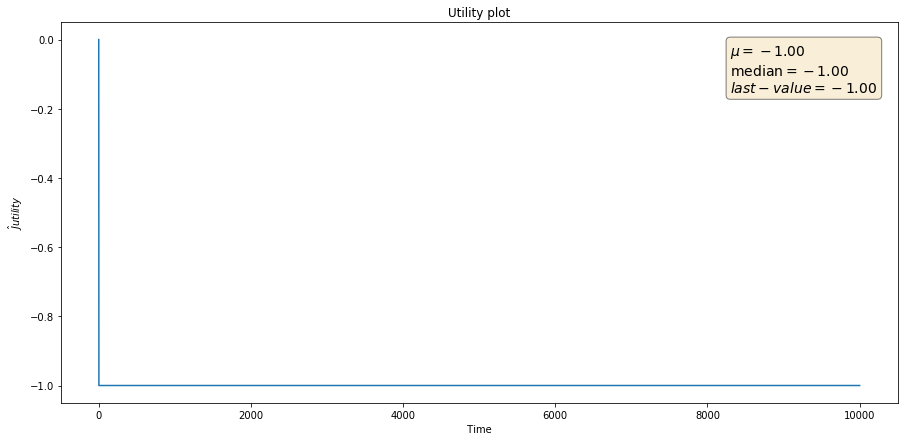

In [89]:
q2_s3.plot_utility()

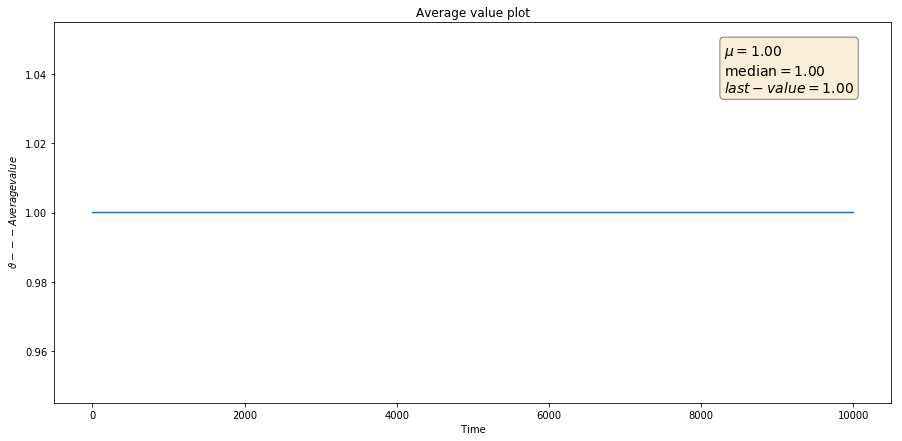

In [90]:
q2_s3.plot_value_function()

#### Conclusion

* 

#### Thompson sampling as policy

In [91]:
from bayesian import Thompson

In [92]:
from bayesian import eGreedy
sampling = eGreedy(4, 0.1)

In [93]:
from bayesian import UCB
sampling = UCB(4)

In [94]:
sampling.action()

2

In [95]:
sampling.update(10)

In [109]:
sampling = eGreedy(4,0.1)

In [110]:
class play:
    
    def __init__(self, initial_state):
        self.rewards = []
        self.utility = [0]
        self.value_matrix = np.zeros((5,5))
        self.delta = []
        self.states = []
        self.initial_state = initial_state
        self.states.append(initial_state)
        self.value_function = []
        self.env = gridworld(initial_state=initial_state)
        self.EPOCHS = EPOCHS
        self.print_epoch = EPOCHS/10
        self.actions = []
    
    def update_value_matrix(self, observation, new_observation, reward, s_alpha):
        '''Return the updated utility matrix
        @param utility_matrix the matrix before the update
        @return the updated utility matrix
        '''
        v_s= self.value_matrix[observation[0], observation[1]]
        v_s1 = self.value_matrix[new_observation[0], new_observation[1]]
        self.utility.append(self.utility[-1]+s_alpha*(reward-self.utility[-1]))
        self.delta.append(reward - self.utility[-1] + v_s1 - v_s)
        new_value = v_s + s_alpha*self.delta[-1]
        self.value_matrix[observation[0], observation[1]] = new_value
        self.value_function.append(self.value_matrix.sum()/25)
    
    def alpha(self, t):
        return 1 / (divmod(t,50)[0]+1)
    
    def run_experiment(self):
        for step in range(self.EPOCHS+1):
            #Take the action from the action matrix
            #action = np.random.randint(4)
            action = sampling.action()
            self.actions.append(action)
            #Move one step in the environment and get obs and reward
            reward, new_state = self.env.step(action)
            sampling.update(reward)
            self.update_value_matrix(self.states[-1], new_state, reward,self.alpha(step))
            self.rewards.append(reward)
            self.states.append(new_state)
            if step%self.print_epoch==0:
                print(" {0:} | states: {1:}| rewards: {2:} | utility :{3:2f}| delta: {4:.2f} | value_function: {5:.2f} | updated".format("step:"+str(step),\
                                                                                                    self.states[-1],\
                                                                                                    self.rewards[-1],\
                                                                                                    self.utility[-1],\
                                                                                                    self.delta[-1],\
                                                                                                    self.value_function[-1]))
    
    def plot_value_matrix(self):
        plt.figure(figsize=(15,7))
        sns.heatmap(self.value_matrix, annot=True,fmt='g')
        plt.title(r" $\vartheta$ state value")
        plt.xlabel("x-axis")
        plt.ylabel("y-axis")
        plt.tight_layout()
        plt.show()
    
    def plot_utility(self):
        fig, ax = plt.subplots()
        fig.set_figheight(7)
        fig.set_figwidth(15)
        plt.plot(self.utility)
        plt.title("Utility plot")
        textstr = '\n'.join((
            r'$\mu=%.2f$' % (np.mean(self.utility), ),
            r'$\mathrm{median}=%.2f$' % (np.median(self.utility), ),
            r'$last-value =%.2f$' % (self.utility[-1])))
        # these are matplotlib.patch.Patch properties
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.8, 0.95, textstr, transform=ax.transAxes, fontsize=14,
                verticalalignment='top',bbox =props)
        plt.xlabel(" Time ")
        plt.ylabel(" $\hat{J}   utility $")
        plt.show()
    
    def plot_value_function(self):
        fig, ax = plt.subplots()
        fig.set_figheight(7)
        fig.set_figwidth(15)
        plt.plot(self.value_function)
        plt.title("Average value plot")
        textstr = '\n'.join((
            r'$\mu=%.2f$' % (np.mean(self.value_function), ),
            r'$\mathrm{median}=%.2f$' % (np.median(self.value_function),),
            r'$last-value =%.2f$' % (self.value_function[-1])))
        # these are matplotlib.patch.Patch properties
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.8, 0.95, textstr, transform=ax.transAxes, fontsize=14,
                verticalalignment='top',bbox =props)
        plt.xlabel(" Time ")
        plt.ylabel(r" $ \vartheta --- Average value $")
        plt.show()

In [111]:
q1_thompson = play([2,2])
q1_thompson.run_experiment()

 step:0 | states: [3, 2]| rewards: 0 | utility :0.000000| delta: 0.00 | value_function: 0.00 | updated
 step:1000 | states: [2, 1]| rewards: 0 | utility :4.763777| delta: 4.04 | value_function: 0.39 | updated
 step:2000 | states: [2, 3]| rewards: 10 | utility :1.983614| delta: 2.48 | value_function: 0.33 | updated
 step:3000 | states: [2, 3]| rewards: 10 | utility :4.915298| delta: -0.02 | value_function: 0.47 | updated
 step:4000 | states: [2, 3]| rewards: 10 | utility :4.219675| delta: 1.10 | value_function: 0.45 | updated
 step:5000 | states: [2, 3]| rewards: 10 | utility :3.920938| delta: 1.11 | value_function: 0.44 | updated
 step:6000 | states: [3, 3]| rewards: -1 | utility :2.460214| delta: -3.46 | value_function: 0.38 | updated
 step:7000 | states: [2, 3]| rewards: 10 | utility :2.571506| delta: 2.95 | value_function: 0.40 | updated
 step:8000 | states: [0, 2]| rewards: -1 | utility :1.860794| delta: -2.86 | value_function: 0.36 | updated
 step:9000 | states: [0, 0]| rewards: 0

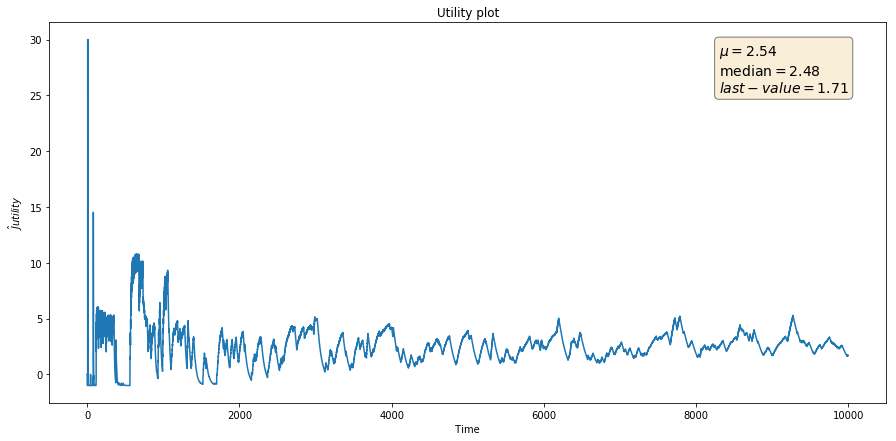

In [112]:
q1_thompson.plot_utility()

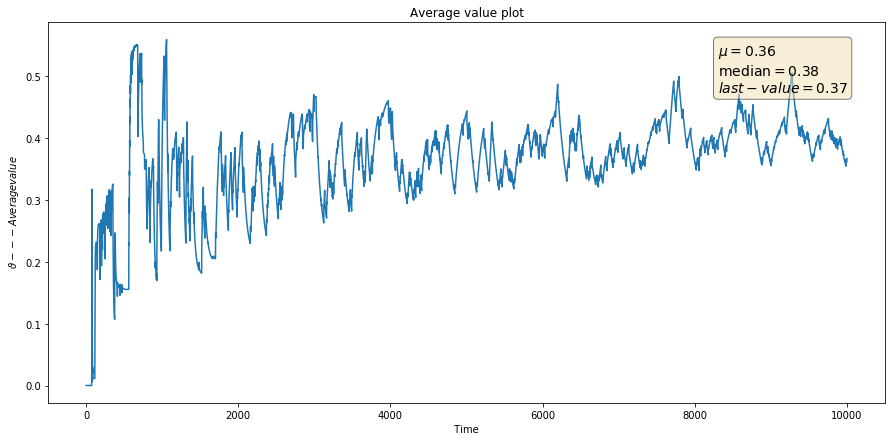

In [113]:
q1_thompson.plot_value_function()

[]

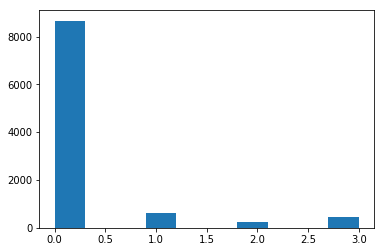

In [114]:
plt.hist(sampling.chosen_arms)
plt.plot()